<a href="https://colab.research.google.com/github/bylarajumeenakshi/calories-burn-prediction-by-machine-learning/blob/main/calories_burn_prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
try:
    data = pd.read_csv('/content/calories.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: '/content/calories.csv' not found. Please provide the correct file path.")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()


Data loaded successfully.


In [3]:
# Data Exploration and Preprocessing

print(data.head())
print(data.info())
print(data.describe())


    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  

In [4]:
# Check for missing values (handle them appropriately: imputation or removal)



print(data.isnull().sum())


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


<Figure size 1000x600 with 0 Axes>

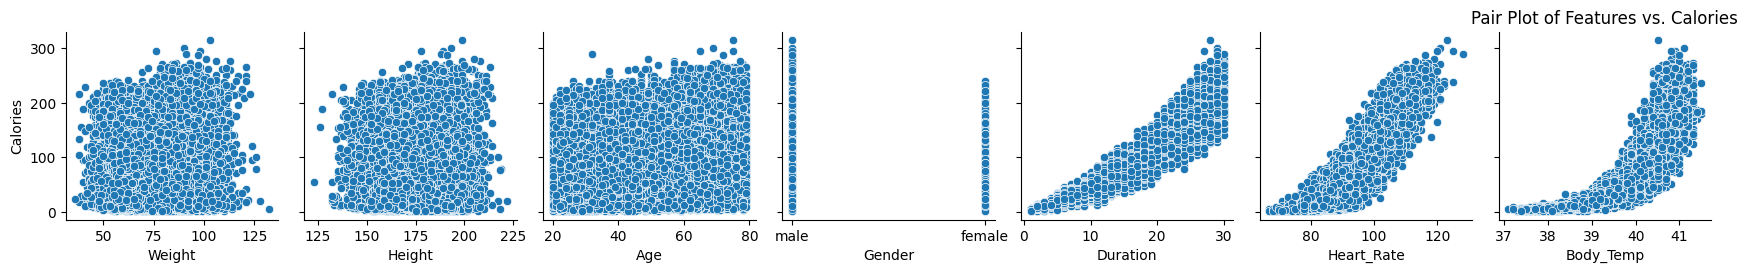

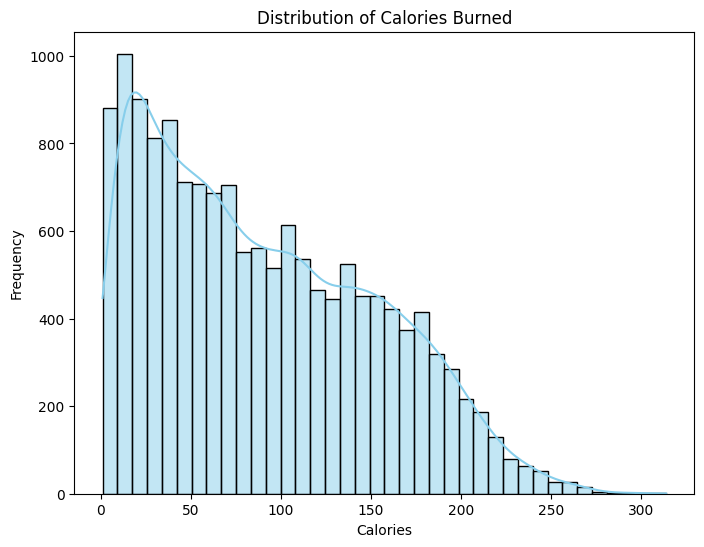

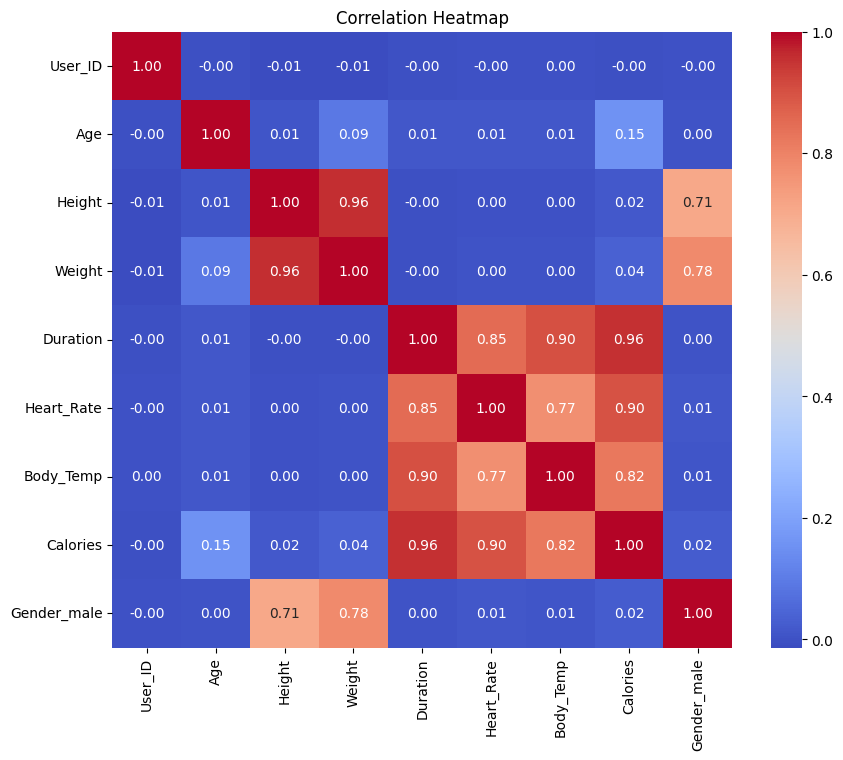

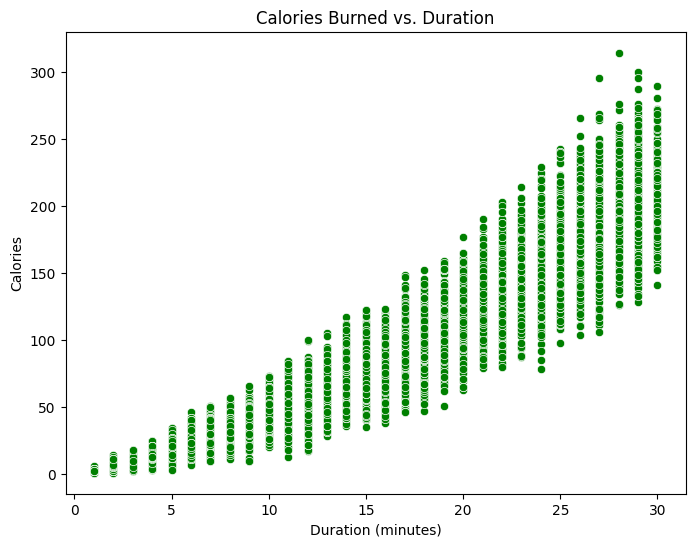

In [7]:
# Data Visualization (Exploratory Data Analysis - EDA)



plt.figure(figsize=(10, 6))
sns.pairplot(data, x_vars=['Weight','Height','Age','Gender','Duration','Heart_Rate','Body_Temp'], y_vars='Calories')
plt.title('Pair Plot of Features vs. Calories')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['Calories'], kde=True, color='skyblue')
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Calories', data=data, color='green')
plt.title('Calories Burned vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories')
plt.show()

X = data.drop('Calories', axis=1)  # Features (exclude 'Calories')
y = data['Calories']  # Target variable ('Calories')


In [6]:
# Example: Impute missing values (if any) with the mean (you might use a different strategy)



for col in data.columns:
    if data[col].isnull().any():
        data[col].fillna(data[col].mean(), inplace=True)


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 132.0675823406644
R-squared: 0.9672759152492366
Mean Squared Error: 132.0675823406644
R-squared: 0.9672759152492366
